## 광고효율을 높일 수 있는 방법이 없을까?
적은 투자로 최대의 효과내기
* 가장 주문이 많이 되는 요일과 시간은?
* 누구를 타겟으로 삼아야 할까?
* 어떤것을 노출시켜야 할까?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
#pip install googletrans

## 폰트설정

In [3]:
# 한글 & 마이너스 폰트 설정
plt.rc("font", family= "Malgun Gothic") 
plt.rc("axes", unicode_minus = False) 

# 시각화 선명하게 하는 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## 데이터 가져오기

In [4]:
order_df = pd.read_csv("dataset/olist_order_items_dataset.csv")
shipping_df = pd.read_csv("dataset/olist_orders_dataset.csv")
category_df = pd.read_csv("dataset/olist_products_dataset.csv")
user_df = pd.read_csv("dataset/olist_customers_dataset.csv")
location_df = pd.read_csv("dataset/olist_geolocation_dataset.csv")
product_category_name_translation_df = pd.read_csv("dataset/product_category_name_translation.csv")
payments_dataset = pd.read_csv("dataset/olist_order_payments_dataset.csv")

## 파일 병합하기

* location_df 가공하기

In [5]:
location_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# 컬럼명 바꾸기
location_df.columns = ['customer_zip_code_prefix', 'lat', 'lng', 'city', 'state']

In [7]:
# 우편번호 그룹화 후 경도 위도 평균값으로 계산
location_df = location_df.groupby('customer_zip_code_prefix').agg({'lat': 'mean', 'lng': 'mean', 'city': 'first', 'state': 'first'}).reset_index()
location_df.head()

,customer_zip_code_prefix,lat,lng,city,state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


* 분석에 필요한 7개 dataset 병합하기

In [8]:
order_df = order_df.merge(shipping_df, how='left', on='order_id')
order_df = order_df.merge(category_df, how='left', on='product_id')
order_df = order_df.merge(user_df, how='left', on='customer_id')
order_df = order_df.merge(location_df, how= 'left', on ='customer_zip_code_prefix')
order_df = order_df.merge(product_category_name_translation_df, how='left', on='product_category_name')
order_df = order_df.merge(payments_dataset, how='left', on='order_id')

## 데이터 전처리

In [9]:
print(order_df.shape)
order_df.head(3)

(117604, 35)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state,lat,lng,city,state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,-21.762775,-41.309633,campos dos goytacazes,RJ,cool_stuff,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,SP,-20.220527,-50.903424,santa fe do sul,SP,pet_shop,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,MG,-19.870305,-44.593326,pará de minas,MG,furniture_decor,1.0,credit_card,5.0,216.87


### 카테고리명 한국어로 번역

In [10]:
# category 와 order_df와 병합해준다.
order_df = order_df.merge(category, how='left', on='product_category_name_english')

NameError: name 'category' is not defined

In [12]:
order_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state,lat,lng,city,state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,-21.762775,-41.309633,campos dos goytacazes,RJ,cool_stuff,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,SP,-20.220527,-50.903424,santa fe do sul,SP,pet_shop,1.0,credit_card,3.0,259.83


### 날짜 데이터 타입 변경

In [13]:
# object 타입으로 되어 있는 날짜 컬럼인 'order_purchase_timestamp' 와 'order_delivered_customer_date' 를
# date 타입으로 바꾼다.

order_df['order_purchase_timestamp']= pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])

### 필요한 컬럼들만 필터링

In [14]:
order_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'lat',
       'lng', 'city', 'state', 'product_category_name_english',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

* 해당 컬럼 선택 이유:

In [18]:
cols =['order_id' ,'order_item_id','product_id', 'price', 'freight_value', 'payment_value','payment_installments','order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date', 'product_category_name_english',
       'customer_id','customer_unique_id', 'customer_zip_code_prefix', 'lat', 'lng', 'city', 'state']

In [19]:
order_df = order_df[cols]

In [20]:
order_df.shape

(117604, 18)

* 컬럼명 수정하기
1. 'order_item_id'(한 주문에 몇개를 주문했는지에 관한 정보) ->  주문수량을 의미하는 'QTY'(Quantity) 로 변경 
2. 'price' (상품가격) -> 'product_price' 로 변경
3. 'freight_value'(배송비) -> 'delivery_value' 로 변경

In [21]:
order_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'payment_value', 'payment_installments', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'product_category_name_english', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'lat', 'lng', 'city', 'state'],
      dtype='object')

In [22]:
order_df = order_df.rename(columns = {'order_item_id': 'QTY', 'price': 'product_price','freight_value':'delivery_price',
                                      'payment_value':'total_price','order_purchase_timestamp':'order_purchase_time' ,
                                      'customer_zip_code_prefix':'zip_code'})
order_df.head(2)

,order_id,QTY,product_id,product_price,delivery_price,total_price,payment_installments,order_status,order_purchase_time,order_delivered_customer_date,product_category_name_english,customer_id,customer_unique_id,zip_code,lat,lng,city,state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,72.19,2.0,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,cool_stuff,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,-21.762775,-41.309633,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,259.83,3.0,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,-20.220527,-50.903424,santa fe do sul,SP


In [23]:
# 수치형에 대한 기술통계값 확인
order_df.describe()

,QTY,product_price,delivery_price,total_price,payment_installments,zip_code,lat,lng
count,117604.000000,117604.000000,117604.000000,117601.000000,117601.000000,117604.000000,117292.000000,117292.000000
mean,1.195920,120.822849,20.045551,172.686752,2.939482,35051.271385,-21.224359,-46.188364
std,0.697721,184.477367,15.861351,267.592290,2.774223,29820.387420,5.571082,4.046119
min,1.000000,0.850000,0.000000,0.000000,0.000000,1003.000000,-33.689948,-72.668881
25%,1.000000,39.900000,13.080000,60.870000,1.000000,11310.000000,-23.589822,-48.097950
50%,1.000000,74.900000,16.290000,108.210000,2.000000,24315.000000,-22.927919,-46.631239
75%,1.000000,134.900000,21.190000,189.260000,4.000000,58600.000000,-20.172209,-43.600508
max,21.000000,6735.000000,409.680000,13664.080000,24.000000,99990.000000,42.184003,-8.723762


In [24]:
# 범주형에 대한 기술통계값 확인
order_df.describe(include ='object')

,order_id,product_id,order_status,product_category_name_english,customer_id,customer_unique_id,city,state
count,117604,117604,117604,115881,117604,117604,117292,117292
unique,98666,32951,7,71,98666,95420,4192,27
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,delivered,bed_bath_table,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP
freq,63,536,115038,11823,63,75,15836,49552


In [25]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117604 non-null  object        
 1   QTY                            117604 non-null  int64         
 2   product_id                     117604 non-null  object        
 3   product_price                  117604 non-null  float64       
 4   delivery_price                 117604 non-null  float64       
 5   total_price                    117601 non-null  float64       
 6   payment_installments           117601 non-null  float64       
 7   order_status                   117604 non-null  object        
 8   order_purchase_time            117604 non-null  datetime64[ns]
 9   order_delivered_customer_date  115037 non-null  datetime64[ns]
 10  product_category_name_english  115881 non-null  object        
 11  

### 배송 완료된 데이터만 필터링 

In [26]:
order_df['order_status'].value_counts()

delivered      115038
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: order_status, dtype: int64

In [27]:
order_df = order_df[order_df['order_status']=='delivered']
# == 하려면 타입이 같아야만 한다.

* 나중을 위해 20개 카테고리 필터링 된 데이터는 df에 담아서 사용하겠습니다.

### 20/80 에 해당되는 카페고리만 필터링
* 잘나가는 카테고리에 집중 

In [28]:
order_df.shape

(115038, 18)

In [29]:
sum(order_df['product_category_name_english'].value_counts()[:20])

100252

In [30]:
(100252/order_df.shape[0])*100

87.14685582155461

In [31]:
order_df['product_category_name_english'].value_counts()[:20]

bed_bath_table              11650
health_beauty                9762
sports_leisure               8733
furniture_decor              8557
computers_accessories        7898
housewares                   7172
watches_gifts                6065
telephony                    4603
garden_tools                 4464
auto                         4284
toys                         4185
cool_stuff                   3907
perfumery                    3478
baby                         3112
electronics                  2807
stationery                   2564
fashion_bags_accessories     2105
pet_shop                     2005
office_furniture             1753
luggage_accessories          1148
Name: product_category_name_english, dtype: int64

In [32]:
top_20=order_df['product_category_name_english'].value_counts()[:20].index.tolist()

In [33]:
df = order_df.loc[order_df['product_category_name_english'].isin(top_20)]

In [34]:
print(df.shape)
df.head()

(100252, 18)


,order_id,QTY,product_id,product_price,delivery_price,total_price,payment_installments,order_status,order_purchase_time,order_delivered_customer_date,product_category_name_english,customer_id,customer_unique_id,zip_code,lat,lng,city,state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,72.19,2.0,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,cool_stuff,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,-21.762775,-41.309633,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,259.83,3.0,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,-20.220527,-50.903424,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,216.87,5.0,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,-19.870305,-44.593326,pará de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,25.78,2.0,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,perfumery,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,-23.089925,-46.611654,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,218.04,3.0,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,-23.243402,-46.827614,varzea paulista,SP


### 결측치 처리


In [35]:
df.shape

(100252, 18)

In [36]:
df.isnull().sum()

order_id                           0
QTY                                0
product_id                         0
product_price                      0
delivery_price                     0
total_price                        3
payment_installments               3
order_status                       0
order_purchase_time                0
order_delivered_customer_date      6
product_category_name_english      0
customer_id                        0
customer_unique_id                 0
zip_code                           0
lat                              261
lng                              261
city                             261
state                            261
dtype: int64

In [37]:
df = df.dropna()

In [38]:
print(df.shape)
df.isnull().sum()

(99982, 18)


order_id                         0
QTY                              0
product_id                       0
product_price                    0
delivery_price                   0
total_price                      0
payment_installments             0
order_status                     0
order_purchase_time              0
order_delivered_customer_date    0
product_category_name_english    0
customer_id                      0
customer_unique_id               0
zip_code                         0
lat                              0
lng                              0
city                             0
state                            0
dtype: int64

In [39]:
df["customer_id"]

0         3ce436f183e68e07877b285a838db11a
1         f6dd3ec061db4e3987629fe6b26e5cce
2         6489ae5e4333f3693df5ad4372dab6d3
3         d4eb9395c8c0431ee92fce09860c5a06
4         58dbd0b2d70206bf40e62cd34e84d795
                        ...               
117599    b51593916b4b8e0d6f66f2ae24f2673d
117600    84c5d4fbaf120aae381fad077416eaa0
117601    29309aa813182aaddc9b259e31b870e6
117602    b5e6afd5a41800fdf401e0272ca74655
117603    96d649da0cc4ff33bb408b199d4c7dcf
Name: customer_id, Length: 99982, dtype: object

* 최종 전처리 된 데이터

In [40]:
df.shape

(99982, 18)

# 브라질에서 가장 많이 소비되는 품목이 있을까?
 ## 브라질의 각 주(state)들이 어떤 카테고리의 품목들은 무엇인가? 
 
 1. 분석의도 
   각 주의 사회적, 경제적, 기후 여건에 따라 특정 물품에 대한 소비가 행태가 나타날 것이다. 가령 기온이 높은 날 시원한 빙과류나 음료의 소비가 증가하는 것 처럼 말이다. 각 주마다 많이 구매하는 품목이 있는지 그리고 그 품목이 무엇인지를 파악하면 그 주의 경제적 여건이나 사회문제를 파악 할 수 있을 것이고 더 나아가 여러 주에서 공통적으로 소비되는 품목이 무엇인지 파악할 수 있을 것이며 그것을 기반으로 브라질이라는 국가의 여러가지 상황을 판단하고 예측하는데 이바지 할 수 있는 데이터를 추출 할 수 있지 않을 까라는 생각에 분석하게 되었다.
   
 2. 분석 진행 과정
    - state로 groupby하여'product_category_name_english'로 데이터 프레임을 가져온다.
    - 각 주에서 주문한 카테고리를 value_counts로 확인해본다
    - 각 주에서 value_counts가 max인 값을 찾아본다.
    - value_counts가 max인 값들 중에서 공통되는 것들이 있는지 알아본다
    - groupby 된 state들에서 공통되는 카테고리가 있는지 파악해본다
    - 공통되는 것이 없다면 최빈값을 가지는 카테고리를 구해본다
    - value_counts가 max인 값들 중에서 공통되는 상품과  groupby 된 state들에서 공통되는 카테고리가 연관이 있는지 파악해보자
    - 만약 크게 공통되는 것이 없다면 각 주에서 가장 많이 소비되는 상품들에 대해 파악한다.
    

In [41]:
df['state'].nunique()
#브라질은 총 27개의 주로 되어 있다.

27

In [42]:
state_list=df['state'].unique()
state_list

array(['RJ', 'SP', 'MG', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
       'PE', 'SC', 'ES', 'MA', 'PA', 'PB', 'AM', 'MT', 'AP', 'PI', 'TO',
       'RO', 'SE', 'RN', 'AC', 'RR'], dtype=object)

In [43]:
cs=df[['state','product_category_name_english']]
#unstack을하면 마지막 그룹화한 열이 열로 올라간다.

In [44]:
cs_1 = cs.groupby('state')['product_category_name_english'].value_counts()
cs_1 = pd.DataFrame(cs_1)
cs_1.head(60)
# cs_1 데이터 프레임은 state와 product_category_name_english를 인덱스로하고  product_category_name_english value_count한 값을 가지는 칼럼으로 구성된 상태이다.

product_category_name_english
state product_category_name_english                               
AC    furniture_decor                                           12
      sports_leisure                                             9
      computers_accessories                                      8
      health_beauty                                              7
      auto                                                       5
      telephony                                                  5
      watches_gifts                                              5
      bed_bath_table                                             4
      electronics                                                4
      housewares                                                 4
      baby                                                       3
      luggage_accessories                                        3
      perfumery                                                  3
      toys                                                       3
      garden_tools                                               2
      stationery                                                 2
      cool_stuff                                                 1
      fashion_bags_accessories                                   1
AL    health_beauty                                             65
      computers_accessories                                     39
      watches_gifts                                             36
      sports_leisure                                            33
      furniture_decor                                           30
      telephony                                                 28
      auto                                                      22
      bed_bath_table                                            19
      cool_stuff                                                18
      garden_tools                                              14
      electronics                                               13
      perfumery                                                 13
      toys                                                      12
      housewares                                                 9
      stationery                                                 9
      baby                                                       7
      office_furniture                                           7
      luggage_accessories                                        6
      fashion_bags_accessories                                   5
      pet_shop                                                   3
AM    health_beauty                                             21
      computers_accessories                                     19
      telephony                                                 15
      sports_leisure                                            13
      watches_gifts                                             10
      bed_bath_table                                             9
      toys                                                       7
      auto                                                       6
      stationery                                                 6
      baby                                                       5
      garden_tools                                               5
      cool_stuff                                                 4
      electronics                                                4
      furniture_decor                                            4
      housewares                                                 4
      pet_shop                                                   4
      luggage_accessories                                        3
      office_furniture                                           2
      perfumery                                                  2
      fashion_bags_accessories                                   1
AP    health_beau

In [45]:
#unstack = 마지막에 작성된 칼럼이나 인덱스명을 칼럼자리로 올려준다. 

In [46]:
cs_1.loc['AC'].iloc[0]

product_category_name_english    12
Name: furniture_decor, dtype: int64

In [47]:
i=list()
i.append(state_list)
i

[array(['RJ', 'SP', 'MG', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
        'PE', 'SC', 'ES', 'MA', 'PA', 'PB', 'AM', 'MT', 'AP', 'PI', 'TO',
        'RO', 'SE', 'RN', 'AC', 'RR'], dtype=object)]

In [48]:
states = list()
for i in range (len(state_list)):
    se = state_list[i]
    states.append(se)
    
len(states)

27

In [49]:
cs_1.loc['AC']

,product_category_name_english
product_category_name_english,
furniture_decor,12
sports_leisure,9
computers_accessories,8
health_beauty,7
auto,5
telephony,5
watches_gifts,5
bed_bath_table,4
electronics,4


In [50]:
def extraction(x):
    topofstates = []
    for a in states:
        topofstates.append(x.loc[a])
    return topofstates
dd=extraction(cs_1)
#각 state마다 category별 순위를 파악 할 수 있는 

In [52]:
c = df.pivot_table(index='product_category_name_english',columns='state', values = 'order_id', aggfunc ='count').fillna(0)
c

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
product_category_name_english,,,,,,,,,,,,,,,,,,,,,
auto,5.0,22.0,6.0,3.0,160.0,60.0,104.0,86.0,97.0,41.0,...,231.0,454.0,20.0,10.0,1.0,190.0,184.0,20.0,1768.0,16.0
baby,3.0,7.0,5.0,0.0,103.0,32.0,64.0,61.0,58.0,26.0,...,167.0,367.0,21.0,10.0,1.0,214.0,115.0,8.0,1279.0,7.0
bed_bath_table,4.0,19.0,9.0,6.0,262.0,87.0,199.0,236.0,242.0,40.0,...,477.0,1742.0,34.0,14.0,3.0,662.0,340.0,15.0,5491.0,10.0
computers_accessories,8.0,39.0,19.0,9.0,259.0,91.0,146.0,156.0,125.0,68.0,...,390.0,1009.0,31.0,23.0,4.0,507.0,322.0,36.0,3164.0,22.0
cool_stuff,1.0,18.0,4.0,2.0,154.0,50.0,73.0,70.0,94.0,32.0,...,228.0,519.0,22.0,13.0,2.0,278.0,168.0,18.0,1421.0,16.0
electronics,4.0,13.0,4.0,4.0,109.0,45.0,47.0,80.0,34.0,13.0,...,183.0,440.0,12.0,6.0,2.0,169.0,125.0,18.0,1033.0,7.0
fashion_bags_accessories,1.0,5.0,1.0,0.0,83.0,29.0,43.0,51.0,45.0,27.0,...,123.0,212.0,7.0,9.0,0.0,84.0,80.0,8.0,879.0,12.0
furniture_decor,12.0,30.0,4.0,3.0,263.0,86.0,139.0,145.0,124.0,46.0,...,524.0,1113.0,29.0,13.0,4.0,570.0,357.0,27.0,3669.0,17.0
garden_tools,2.0,14.0,5.0,2.0,186.0,61.0,58.0,105.0,119.0,23.0,...,226.0,666.0,20.0,6.0,2.0,292.0,185.0,29.0,1599.0,13.0


In [53]:
c["AC"][c["AC"] == c["AC"].max()].index[0]
#시리즈에서는 칼럼의 값이 무의미 하기때문에 [][] 의 두번째 []에는 인덱스 값을 의미하게 된다.

'furniture_decor'

def redf(x):
    kk         = []
    max_list   = []
    categories = []
    state_list = []
    for a in states:
        mm = x[a][x[a]==x[a].max()].index[0]
        max_list.append(x[a].max())
        categories.append(mm)
        state_list.append(a)
    
    kk.append(max_list)
    kk.append(categories)
    kk.append(states)
    return kk

zzz = redf(c)

In [73]:
haha=pd.DataFrame({"max": zzz[0], "category": zzz[1], "state": zzz[2]})
# pd.DataFrame(data = zzz, columns = ['max', 'category', 'states'])
haha.value_counts('category')

category
health_beauty      16
bed_bath_table      6
sports_leisure      3
furniture_decor     2
dtype: int64

In [74]:
haha=haha.sort_values('state')
haha

,max,category,state
25,12.0,furniture_decor,AC
6,65.0,health_beauty,AL
17,21.0,health_beauty,AM
19,10.0,health_beauty,AP
5,384.0,health_beauty,BA
8,169.0,health_beauty,CE
9,231.0,health_beauty,DF
13,236.0,bed_bath_table,ES
4,242.0,bed_bath_table,GO
14,90.0,health_beauty,MA


브라질에서는 27개 주 중에서 16개의 주에서 건강의 아름다움 카테고리의 상품을 가장 많이 구매하였고, 6개의 주에서는 침대의 욕조 테이블을 가장 많이 구매하였다.
브라질의 소비되는 품목은 대부분이 건강, 뷰티, 침대 욕조 테이블과 관련된 물품들이었다.

In [75]:
oops = df[['state','lat','lng']]
site = oops.drop_duplicates('state').sort_values('state')

In [76]:
scdf=c.transpose()

In [77]:
tdf=pd.merge(scdf,site,how='left',on='state')
tdf=pd.merge(tdf,haha,how='left',on='state')
tdf
#각 주를 알파뱃순으로 정렬, 가장 많이 팔린 카테고리, 그 카테고리의 판매 갯수, 위도, 경도 를 모두 합쳐 놓은 종합 표 완성

,state,auto,baby,bed_bath_table,computers_accessories,cool_stuff,electronics,fashion_bags_accessories,furniture_decor,garden_tools,...,pet_shop,sports_leisure,stationery,telephony,toys,watches_gifts,lat,lng,max,category
0,AC,5.0,3.0,4.0,8.0,1.0,4.0,1.0,12.0,2.0,...,0.0,9.0,2.0,5.0,3.0,5.0,-9.993372,-67.816433,12.0,furniture_decor
1,AL,22.0,7.0,19.0,39.0,18.0,13.0,5.0,30.0,14.0,...,3.0,33.0,9.0,28.0,12.0,36.0,-9.784323,-36.349941,65.0,health_beauty
2,AM,6.0,5.0,9.0,19.0,4.0,4.0,1.0,4.0,5.0,...,4.0,13.0,6.0,15.0,7.0,10.0,-3.065017,-60.058982,21.0,health_beauty
3,AP,3.0,0.0,6.0,9.0,2.0,4.0,0.0,3.0,2.0,...,2.0,8.0,2.0,4.0,3.0,8.0,0.055709,-51.061550,10.0,health_beauty
4,BA,160.0,103.0,262.0,259.0,154.0,109.0,83.0,263.0,186.0,...,62.0,299.0,75.0,261.0,125.0,237.0,-15.673596,-38.949305,384.0,health_beauty
5,CE,60.0,32.0,87.0,91.0,50.0,45.0,29.0,86.0,61.0,...,16.0,93.0,37.0,95.0,65.0,149.0,-3.737882,-38.502701,169.0,health_beauty
6,DF,104.0,64.0,199.0,146.0,73.0,47.0,43.0,139.0,58.0,...,37.0,208.0,45.0,86.0,93.0,135.0,-15.862281,-48.080445,231.0,health_beauty
7,ES,86.0,61.0,236.0,156.0,70.0,80.0,51.0,145.0,105.0,...,26.0,179.0,51.0,116.0,100.0,151.0,-20.339044,-40.309098,236.0,bed_bath_table
8,GO,97.0,58.0,242.0,125.0,94.0,34.0,45.0,124.0,119.0,...,27.0,169.0,49.0,126.0,89.0,154.0,-16.349355,-48.955467,242.0,bed_bath_table
9,MA,41.0,26.0,40.0,68.0,32.0,13.0,27.0,46.0,23.0,...,10.0,65.0,20.0,64.0,24.0,60.0,-5.519211,-47.461428,90.0,health_beauty


In [78]:
from folium.plugins import MiniMap
m = folium.Map(location=[-11.729307,-49.066735],zoom_start=4)
minimap = MiniMap() 
minimap.add_to(m)
folium.Marker(location=[-11.729307,-49.066735],    
              tooltip="TO",
              popup="TO",
              ).add_to(m)
m

In [79]:
for i in range(len(tdf)):
    lat = tdf.loc[i,'lat']
    long = tdf.loc[i,'lng']
    name = tdf.loc[i,'state']
    category=tdf.loc[i,'category']
    folium.Marker([lat,long],tooltip=name,popup=category).add_to(m)
m

In [80]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster()
for i in range(len(tdf)):
    lat = tdf.loc[i,'lat']
    long = tdf.loc[i,'lng']
    name = tdf.loc[i,'state']
    folium.Marker([lat,long],tooltip=name,popup=category).add_to(marker_cluster)
m

bar.plot과 heat맵으로 어느 중에서 어떤 것을 많이 소비하는지도 파악해 보았다.

<AxesSubplot:xlabel='state', ylabel='max'>

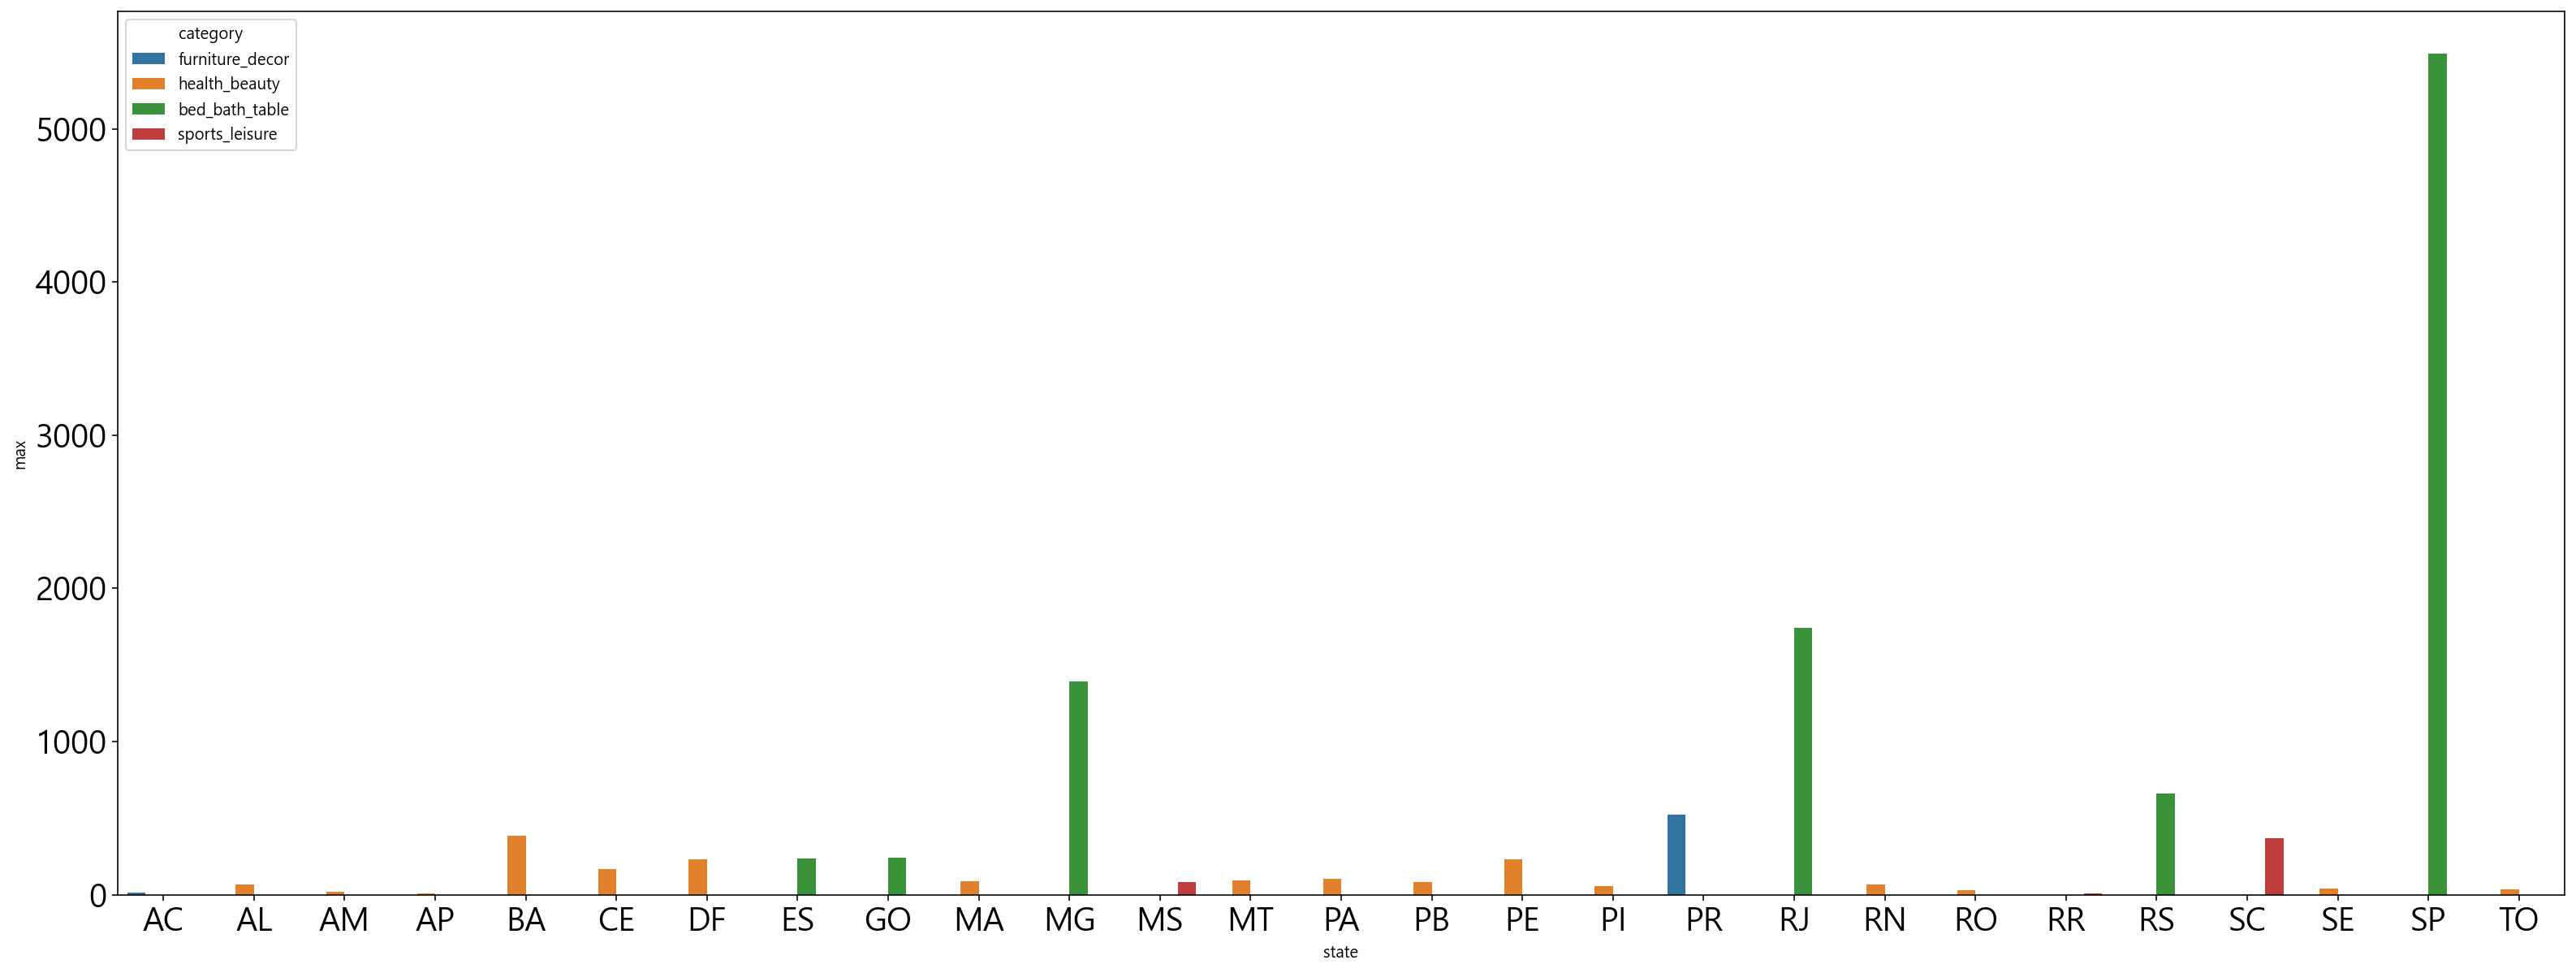

In [68]:
plt.figure(figsize=(27,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
sns.barplot(data = haha, x = 'state', y = 'max', hue = 'category')

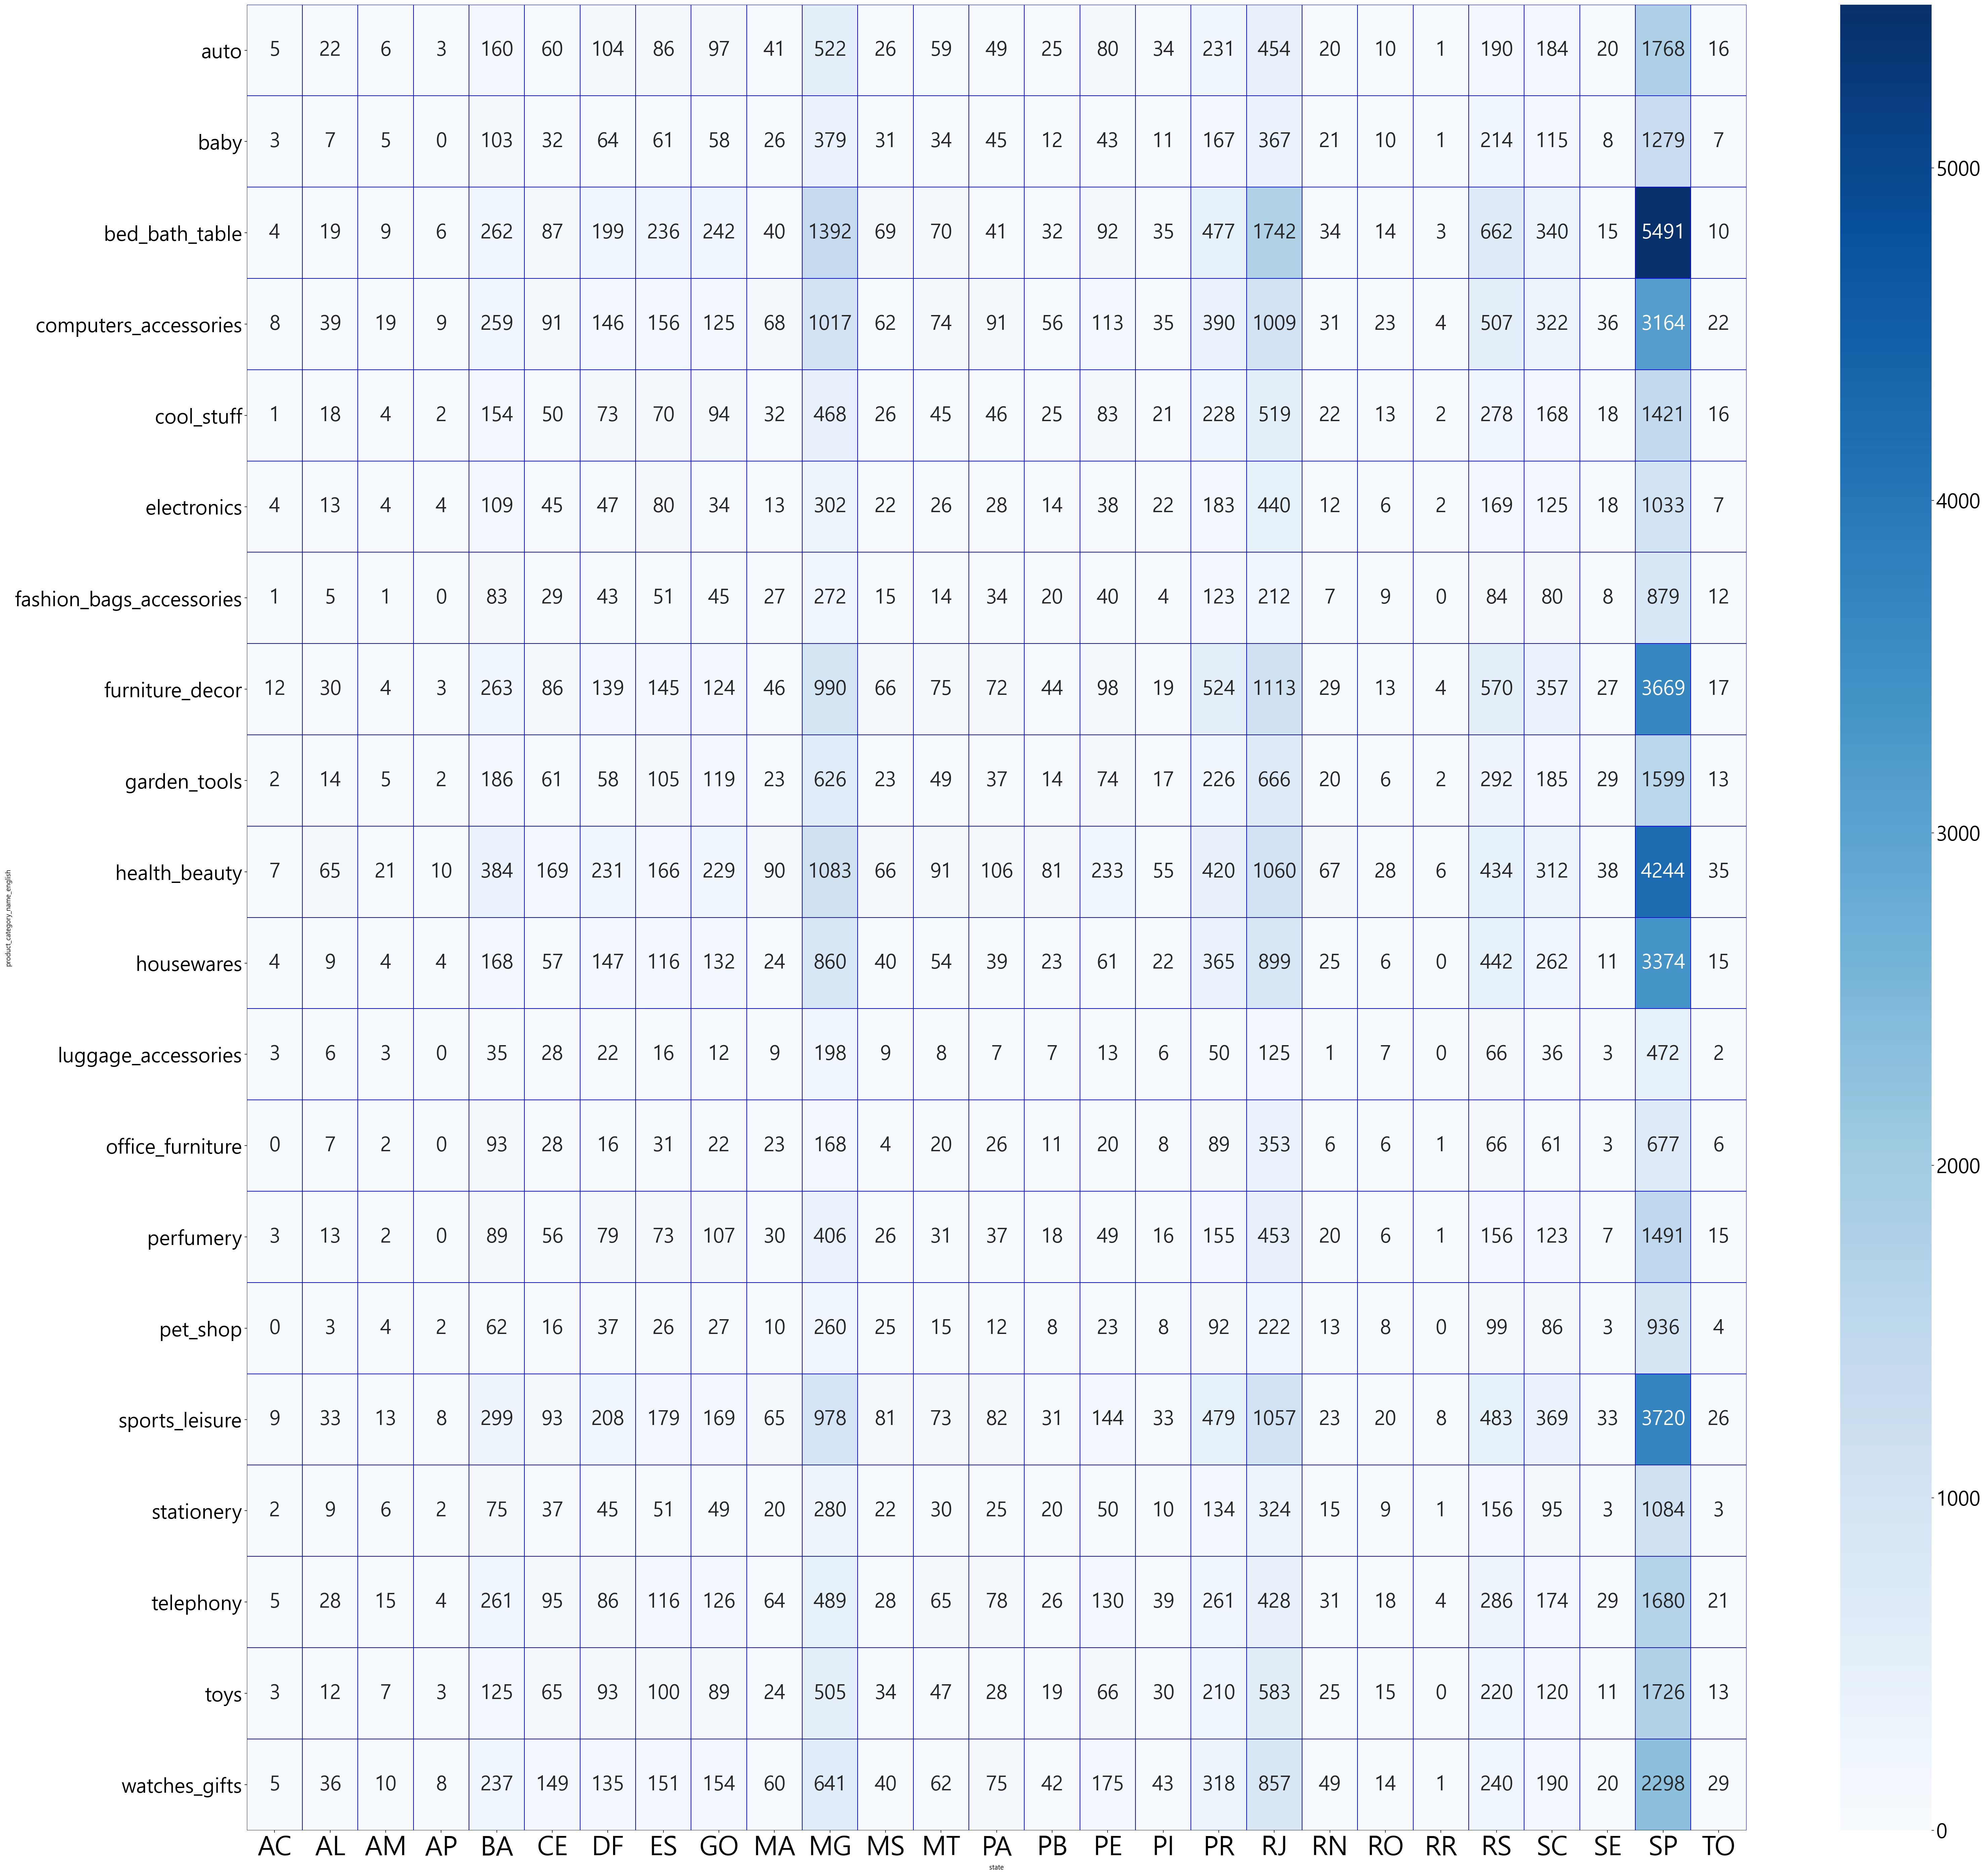

In [66]:
plt.figure(figsize=(50,50))
plt.rc('xtick',labelsize=40)
plt.rc('ytick',labelsize=30)
_=sns.heatmap(data=c, annot = True, fmt = '.0f',linewidths=.5,cmap='Blues',annot_kws={"size": 30},linecolor='Blue')

#heatmap안에서도 df에 np.log적용된다.

In [81]:
#style.background_gradient를 이용한 시각화
c.astype(int).style.background_gradient()

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
product_category_name_english,,,,,,,,,,,,,,,,,,,,,,,,,,,
auto,5,22,6,3,160,60,104,86,97,41,522,26,59,49,25,80,34,231,454,20,10,1,190,184,20,1768,16
baby,3,7,5,0,103,32,64,61,58,26,379,31,34,45,12,43,11,167,367,21,10,1,214,115,8,1279,7
bed_bath_table,4,19,9,6,262,87,199,236,242,40,1392,69,70,41,32,92,35,477,1742,34,14,3,662,340,15,5491,10
computers_accessories,8,39,19,9,259,91,146,156,125,68,1017,62,74,91,56,113,35,390,1009,31,23,4,507,322,36,3164,22
cool_stuff,1,18,4,2,154,50,73,70,94,32,468,26,45,46,25,83,21,228,519,22,13,2,278,168,18,1421,16
electronics,4,13,4,4,109,45,47,80,34,13,302,22,26,28,14,38,22,183,440,12,6,2,169,125,18,1033,7
fashion_bags_accessories,1,5,1,0,83,29,43,51,45,27,272,15,14,34,20,40,4,123,212,7,9,0,84,80,8,879,12
furniture_decor,12,30,4,3,263,86,139,145,124,46,990,66,75,72,44,98,19,524,1113,29,13,4,570,357,27,3669,17
garden_tools,2,14,5,2,186,61,58,105,119,23,626,23,49,37,14,74,17,226,666,20,6,2,292,185,29,1599,13


In [151]:
#df.groupby(['state','category_name_kor'])['order_id'].count().unstack()